<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_CD_2024/blob/main/IMT_Ex_PlotRelations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


In [4]:
#@markdown **Just run to prepare Lab**
%%capture none
!pip install dataprep

import pandas as pd

from dataprep.datasets import load_dataset
df = load_dataset('house_prices_train')

df = df[[ 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'YearBuilt', 'BedroomAbvGr', 'YrSold', 'SaleType', 'SalePrice', 'GrLivArea']]
df.to_csv('house_prices.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



# **CASE: House Prices**

In [ ]:
df = pd.read_csv("house_prices.csv")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,YearBuilt,BedroomAbvGr,YrSold,SaleType,SalePrice,GrLivArea
0,60,RL,65.0,8450,2003,3,2008,WD,208500,1710
1,20,RL,80.0,9600,1976,3,2007,WD,181500,1262
2,60,RL,68.0,11250,2001,3,2008,WD,223500,1786
3,70,RL,60.0,9550,1915,3,2006,WD,140000,1717
4,60,RL,84.0,14260,2000,4,2008,WD,250000,2198


# Q1. Linear Correlations

Crie gráficos de dispersão ou empregue o `pairplot` para verificar qual atributos dos imóveis apresenta maior correlação com os preços dos imóveis. Confirme isso verificando a correlação (Pearson) com o método `.corr()` ou a função `np.pearson()`. Sugestão: explore esses métodos na documentação das bibliotecas.

Q. Qual o atributo mais correlacionado aos preços e qual o valor do coeficiente (pearson) encontrado?

**Dica:** melhor com `df.select_dtypes(include='number')`

# Q2. Correlation Heatmap

Produza um `heatmap` das correlações numéricas de todas as variáveis. Inclua os valores das correlações no gráfico (parâmetro `annot`) e ajuste deamais aspectos do gráfico para que fique legível e com bom aspecto. Algumas sugestões estão nas alternativas do questionário e você pode buscar se aproximar da figura abaixo.

Q2. No ajuste do aspecto do gráfico o que pareceu ser mais útil?

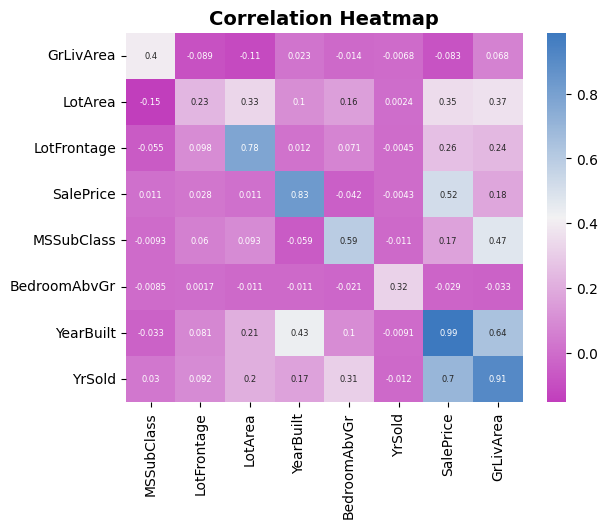

# Q3. "*Nice*" Correlation Table

Use a função abaixo para produzir a tabela de correlação para os diferentes coeficientes, isto é *pearson*, *spearman* e *kendall*.

Q3. Para que atributos os coeficientes divergem de orientação?

Sim, os coeficientes podem divergir!


In [ ]:
import pandas as pd
from IPython.display import display, Latex, HTML

def gera_latex_table(df, titulo):
# create a latex table from a dataframe
# Created by: Rogerio de Oliveira
# Date: 2023-12-05
#
# issues: df.style.to_latex changes, replace changes


  latex_table = df.style.to_latex(hrules=True)

  latex_table = latex_table.replace('tabular','array')
  latex_table = latex_table.replace('toprule','hline')
  latex_table = latex_table.replace('midrule','hline')
  latex_table = latex_table.replace('bottomrule','hline')

  latex_table = '\\textbf{' + titulo + '} \\\\' + latex_table

  return latex_table

In [ ]:
display(Latex(gera_latex_table(df_corr,'SalePrice Correlations')))

<IPython.core.display.Latex object>

# Q4. Outliers

Uma análise importante é a dos *outliers*. Exclua os outliers de preços e verifique se os coeficientes permanecem *robustos*.

Q. O coeficiente de *pearson* permanece robusto quanto ao atributo de maior correlação para os preços?

**Dica**: aprenda a usar `fig['fliers'][0].get_data()` do matplotlib para excluir os outliers.

In [ ]:
display(Latex(gera_latex_table(df_corr,'SalePrice Correlations - NO OUTLIERS')))

<IPython.core.display.Latex object>

# Q5. Consistência do coeficiente por diferentes classes

Verifique se coeficiente de pearson para o atributo mais correlacionado é robusto para os diferentes tipos de venda `SaleType` e `MSZoning`.

Q. Para quais tipos o coeficiente se mantêm robusto?


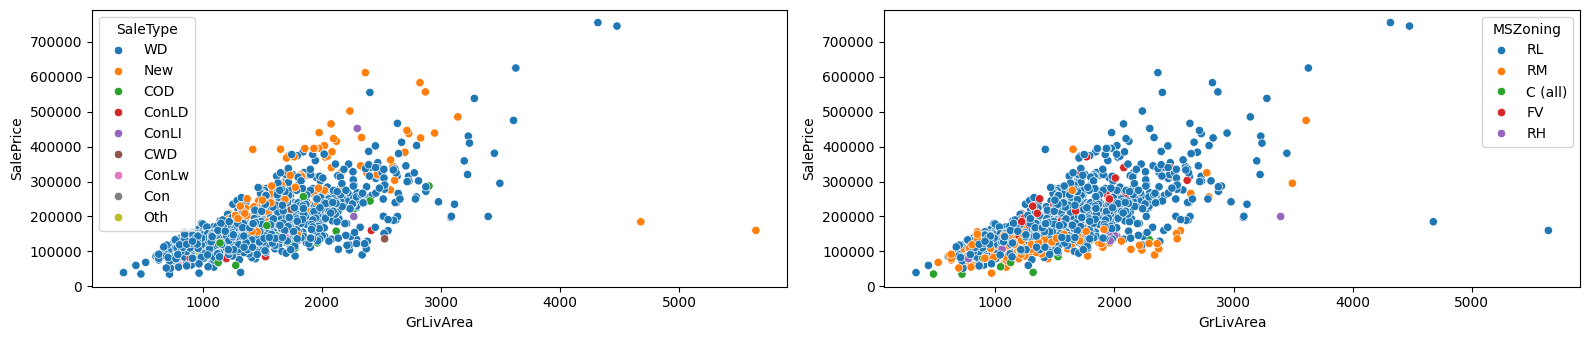

In [ ]:
plt.figure(figsize=(16, 3.5))

plt.subplot(1,2,1)
sns.scatterplot(x=df['GrLivArea'],y=df['SalePrice'],hue=df['SaleType'])

plt.subplot(1,2,2)
sns.scatterplot(x=df['GrLivArea'],y=df['SalePrice'],hue=df['MSZoning'])

plt.tight_layout()
plt.show()

In [ ]:
df_corr # by SaleType

,GrLivArea,Qty
Oth,0.634119,677.102423
COD,0.406262,65.198497
ConLw,0.621939,22.979798
Con,0.399088,4.809725
New,0.604259,2.672070
WD,-0.250482,2.137656
ConLI,0.640603,2.672070
ConLD,0.846311,1.068828
CWD,0.703950,1.603242


In [ ]:
df_corr # By MSZoning

,GrLivArea,Qty
C (all),0.170596,456.679363
RM,0.142524,86.495309
RH,0.183202,3.967675
RL,0.181851,25.789886
FV,0.179414,6.348280


# Q6. Preços para Novos e Outros, Linha Média

Você concluiu que os preços dos imóveis novos destoam dos demais. Vamos então produzir um gráfico para evidenciar essa análise.

Como não há uma função bem definida e não temos um modelo de função conhecido, vamos criar uma linha média de valores. Você pode empregar a função a seguir para criar os valores e criar um gráfico o mais próximo possível do abaixo.

Poste no Canvas o gráfico produzido.

In [ ]:
def media_bins(num_bins,df,column_bin,column_target):
# create media bins values
# Created by: Rogerio de Oliveira
# Date: 2023-12-01
#
# issues: how put other than means?

  bin_edges = np.linspace(df[column_bin].min(), df[column_bin].max(), num_bins + 1)
  b_mean = df.groupby(pd.cut(df[column_bin], bin_edges))[column_target].mean()
  bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

  return bin_centers,b_mean

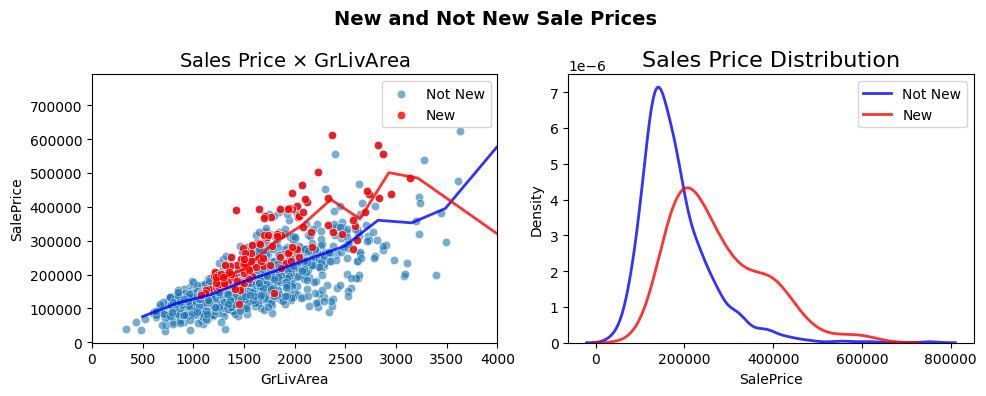